# Визуализация результатов экспериментов

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle


## загрузка данных

In [107]:
saved_dir = "/home/kostya03/Downloads/"
files = ["all_lstm_metrics_v1_hidden_dim_WITH_diff_target",
         "all_lstm_metrics_v2_num_layers_WITH_diff_target",
         "all_enhanced_lstm_metrics_v1_hidden_dim_WITH_diff_target",
         "all_enhanced_lstm_metrics_v2_num_layers_WITH_diff_target",
         "all_enhanced_lstm_metrics_v3_abalation_study_WITH_diff_target",
         "all_enhanced_lstm_metrics_v4_big_df_study_WITH_diff_target",
         "all_enhanced_lstm_metrics_v5_seq_len_WITH_diff_target"]
csv_files = [pd.read_csv(f"{saved_dir}/{file}.csv") for file in files]
csv_files = dict(zip(files, csv_files))

In [108]:
csv_files["all_lstm_metrics_v1_hidden_dim_WITH_diff_target"]

,Unnamed: 0,lr,do_cut_train,hidden_dim,num_layers,train_mse,train_mape,train_direct_accuracy,test_mse,test_mape,test_direct_accuracy
0,0,0.001,False,192,10,19826.399559,0.033386,0.510305,15116.476410,0.036236,0.527216
1,1,0.001,True,192,10,19810.755211,0.033524,0.489695,15157.880042,0.036446,0.472784
2,2,0.001,False,256,10,19820.449876,0.033405,0.510305,15120.235962,0.036270,0.527216
3,3,0.001,True,256,10,18652.833552,0.032885,0.577754,15868.339463,0.037381,0.523328
4,4,0.001,False,512,10,19824.126024,0.033393,0.510305,15117.660560,0.036248,0.527216
5,5,0.001,True,512,10,19810.977708,0.033529,0.489695,15159.669814,0.036453,0.472784
6,6,0.001,False,1024,10,19799.590060,0.033452,0.494724,15131.232969,0.036352,0.486003
7,7,0.001,True,1024,10,19811.577338,0.033540,0.489695,15163.659095,0.036466,0.472784


In [109]:
cbt_df = pd.DataFrame([
    {'target': "norm", "scaler": "StandardScaler", "MAPE" : 0.095003, "Direct Accuracy" : 0.522241},
    {'target': "diff", "scaler": "StandardScaler", "MAPE" : 0.457273, "Direct Accuracy" : 0.504119},
    {'target': "norm", "scaler": "MinMaxScaler", "MAPE" : 0.093895, "Direct Accuracy" : 0.507414},
    {'target': "diff", "scaler": "MinMaxScaler", "MAPE" : 0.036116, "Direct Accuracy" : 0.532949},
])
cbt_df

,target,scaler,MAPE,Direct Accuracy
0,norm,StandardScaler,0.095003,0.522241
1,diff,StandardScaler,0.457273,0.504119
2,norm,MinMaxScaler,0.093895,0.507414
3,diff,MinMaxScaler,0.036116,0.532949


## Строим графики

## Вспомогательная функция

In [91]:
def visual_res(cur_df, title, x_label, x_label_name):
    # Создаем фигуру с двумя подграфиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # График MAPE (слева)
    sns.lineplot(x=x_label, y="test_mape", data=cur_df[cur_df['do_cut_train'] == True], ax=ax1, label='Test MAPE (with cut)')
    sns.lineplot(x=x_label, y="train_mape", data=cur_df[cur_df['do_cut_train'] == True], ax=ax1, linestyle='--', label='Train MAPE (with cut)')
    sns.lineplot(x=x_label, y="test_mape", data=cur_df[cur_df['do_cut_train'] == False], ax=ax1, label='Test MAPE (no cut)')
    sns.lineplot(x=x_label, y="train_mape", data=cur_df[cur_df['do_cut_train'] == False], ax=ax1, linestyle='--', label='Train MAPE (no cut)')
    ax1.set_title("MAPE")
    ax1.set_xlabel(x_label_name)
    ax1.set_ylabel("MAPE")

    # График Direct Accuracy (справа)
    sns.lineplot(x=x_label, y="test_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == True], ax=ax2, label='Test Accuracy (with cut)')
    sns.lineplot(x=x_label, y="train_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == True], ax=ax2, linestyle='--', label='Train Accuracy (with cut)')
    sns.lineplot(x=x_label, y="test_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == False], ax=ax2, label='Test Accuracy (no cut)')
    sns.lineplot(x=x_label, y="train_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == False], ax=ax2, linestyle='--', label='Train Accuracy (no cut)')
    ax2.set_title("Direct Accuracy")
    ax2.set_xlabel(x_label_name)
    ax2.set_ylabel("Direct Accuracy")

    # Добавляем общий заголовок
    plt.suptitle(title, y=1.05)

    # Настраиваем легенду
    plt.tight_layout()
    plt.show()

In [97]:
def visual_res2(cur_df, title_mape, title_acc, x_label, x_label_name):
    # Первая фигура — MAPE
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    # sns.lineplot(x=x_label, y="test_mape", data=cur_df[cur_df['do_cut_train'] == True], ax=ax1, label='Test MAPE (with cut)')
    # sns.lineplot(x=x_label, y="train_mape", data=cur_df[cur_df['do_cut_train'] == True], ax=ax1, linestyle='--', label='Train MAPE (with cut)')
    sns.lineplot(x=x_label, y="test_mape", data=cur_df[cur_df['do_cut_train'] == False], ax=ax1, label='Test MAPE')
    sns.lineplot(x=x_label, y="train_mape", data=cur_df[cur_df['do_cut_train'] == False], ax=ax1, linestyle='--', label='Train MAPE')
    ax1.set_title(title_mape)
    ax1.set_xlabel(x_label_name)
    ax1.set_ylabel("MAPE")
    ax1.legend()
    plt.tight_layout()
    plt.show()

    # Вторая фигура — Direct Accuracy
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    # sns.lineplot(x=x_label, y="test_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == True], ax=ax2, label='Test Accuracy (with cut)')
    # sns.lineplot(x=x_label, y="train_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == True], ax=ax2, linestyle='--', label='Train Accuracy (with cut)')
    sns.lineplot(x=x_label, y="test_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == False], ax=ax2, label='Test Accuracy')
    sns.lineplot(x=x_label, y="train_direct_accuracy", data=cur_df[cur_df['do_cut_train'] == False], ax=ax2, linestyle='--', label='Train Accuracy')
    ax2.set_title(title_acc)
    ax2.set_xlabel(x_label_name)
    ax2.set_ylabel("Direct Accuracy")
    ax2.legend()
    plt.tight_layout()
    plt.show()

## Данные катбустов

In [28]:
cbt_df

,target,scaler,MAPE,Direct Accuracy
0,norm,StandardScaler,0.095003,0.522241
1,diff,StandardScaler,0.457273,0.504119
2,norm,MinMaxScaler,0.093895,0.507414
3,diff,MinMaxScaler,0.036116,0.532949


## Зависимости для LSTM

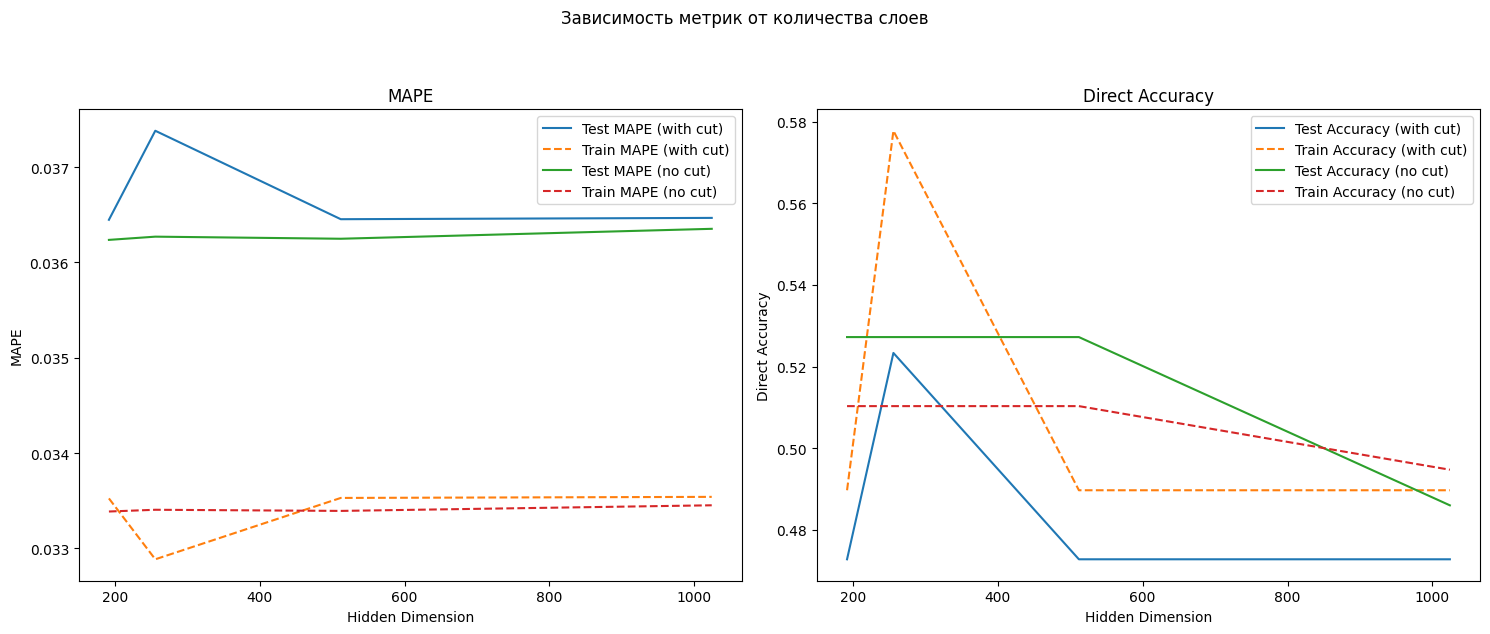

In [23]:
visual_res(csv_files["all_lstm_metrics_v1_hidden_dim_WITH_diff_target"],
           title="Зависимость метрик от количества слоев",
           x_label="hidden_dim",
           x_label_name="Hidden Dimension")

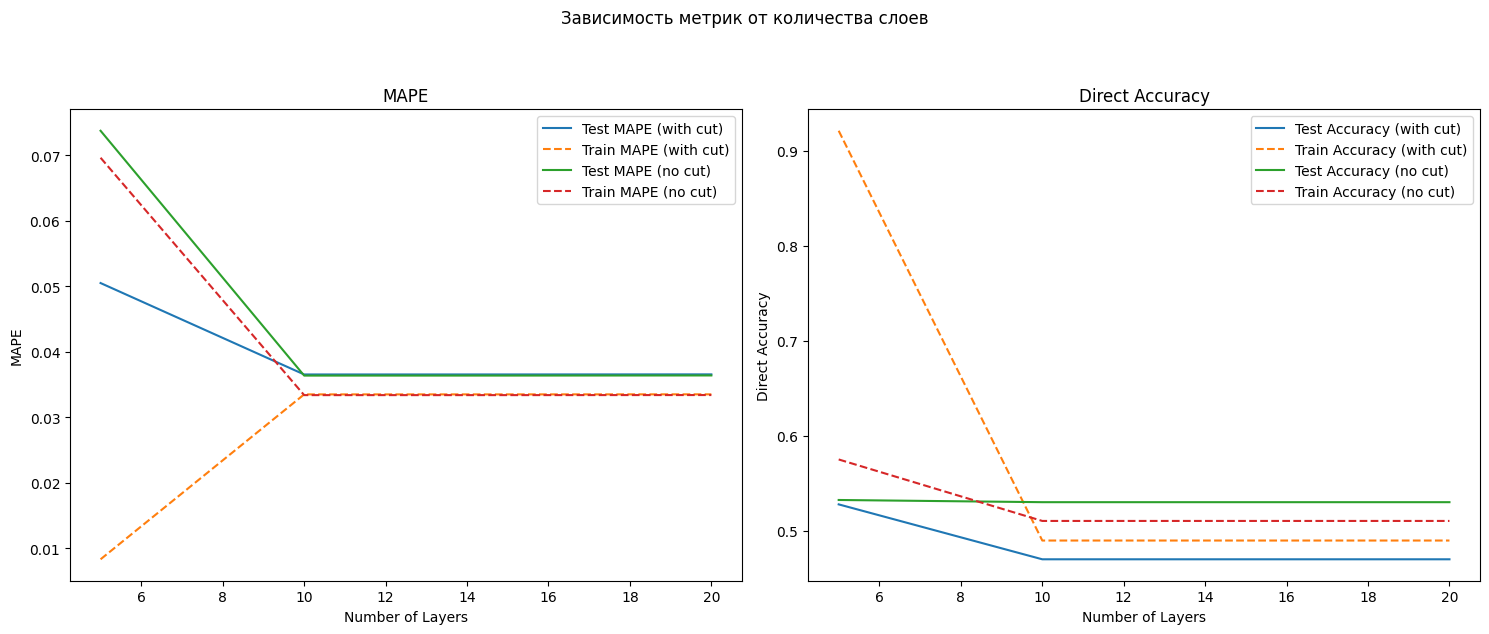

In [16]:
visual_res(csv_files["all_lstm_metrics_v2_num_layers_WITH_diff_target"],
           title="Зависимость метрик от количества слоев",
           x_label="num_layers",
           x_label_name="Number of Layers")

## Зависимости для EnhancedLSTM

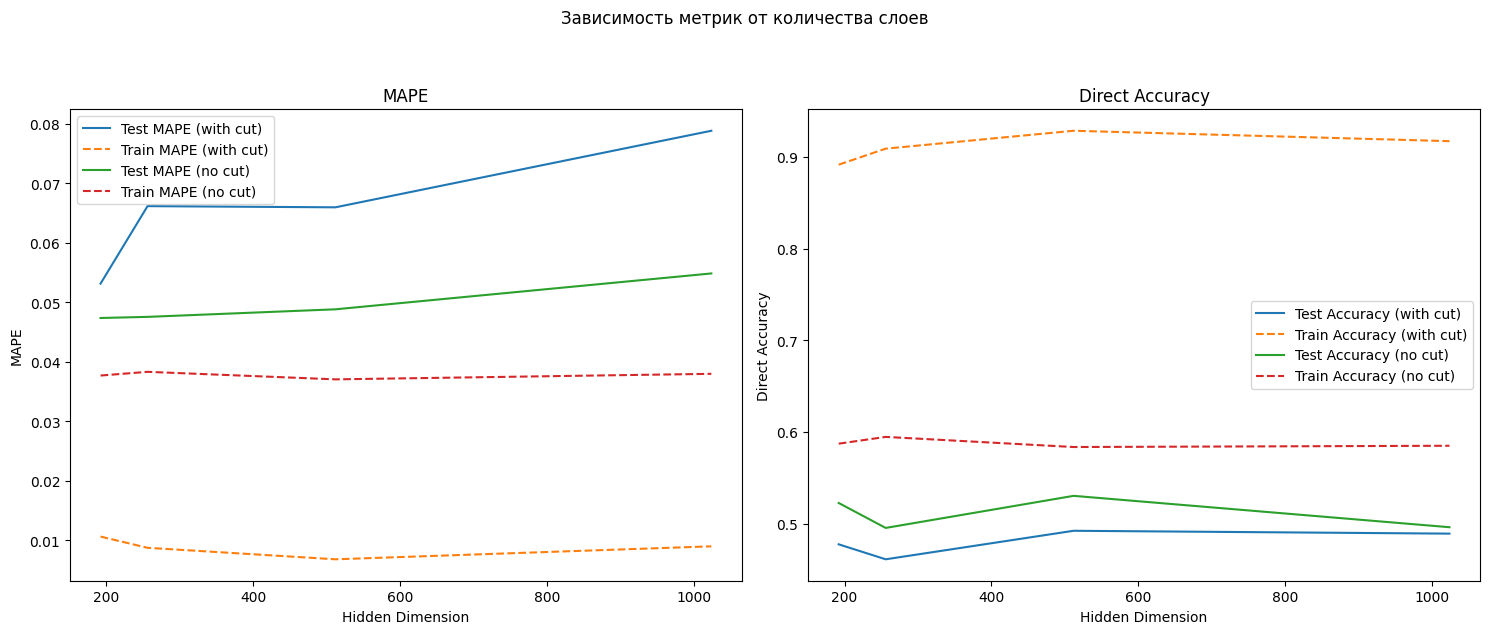

In [ ]:
visual_res(csv_files["all_enhanced_lstm_metrics_v1_hidden_dim_WITH_diff_target"],
           title="Зависимость метрик от количества слоев",
           x_label="hidden_dim",
           x_label_name="Hidden Dimension")

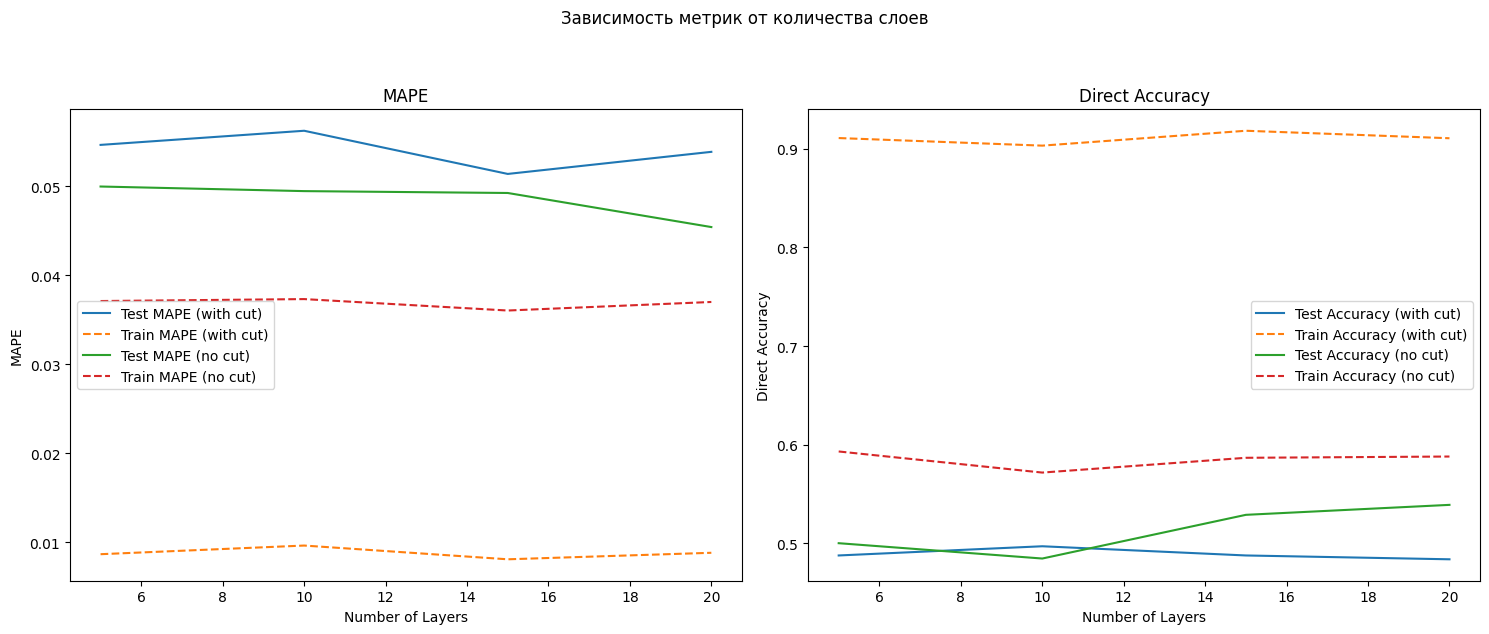

In [ ]:
visual_res(csv_files["all_enhanced_lstm_metrics_v2_num_layers_WITH_diff_target"],
           title="Зависимость метрик от количества слоев",
           x_label="num_layers",
           x_label_name="Number of Layers")

In [36]:
cur_df = csv_files["all_enhanced_lstm_metrics_v3_abalation_study_WITH_diff_target"]
cur_df = cur_df[["do_use_cnn", "do_use_attention", "do_use_lstm",
                 "train_mape", "test_mape", "train_direct_accuracy", "test_direct_accuracy"]]

cur_df.sort_values(by=["do_use_cnn", "do_use_attention", "do_use_lstm"], inplace=True)
cur_df

/tmp/ipykernel_2913821/282088551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df.sort_values(by=["do_use_cnn", "do_use_attention", "do_use_lstm"], inplace=True)


,do_use_cnn,do_use_attention,do_use_lstm,train_mape,test_mape,train_direct_accuracy,test_direct_accuracy
0,False,False,False,0.042064,0.057376,0.577063,0.523883
4,False,False,True,0.039162,0.068905,0.572034,0.549307
1,False,True,False,0.033399,0.036372,0.510305,0.530046
5,False,True,True,0.034102,0.040151,0.563061,0.534669
2,True,False,False,0.037403,0.047483,0.579331,0.520801
6,True,False,True,0.036615,0.051139,0.588502,0.514638
3,True,True,False,0.035907,0.049525,0.588897,0.528505
7,True,True,True,0.037607,0.048838,0.598560,0.510015


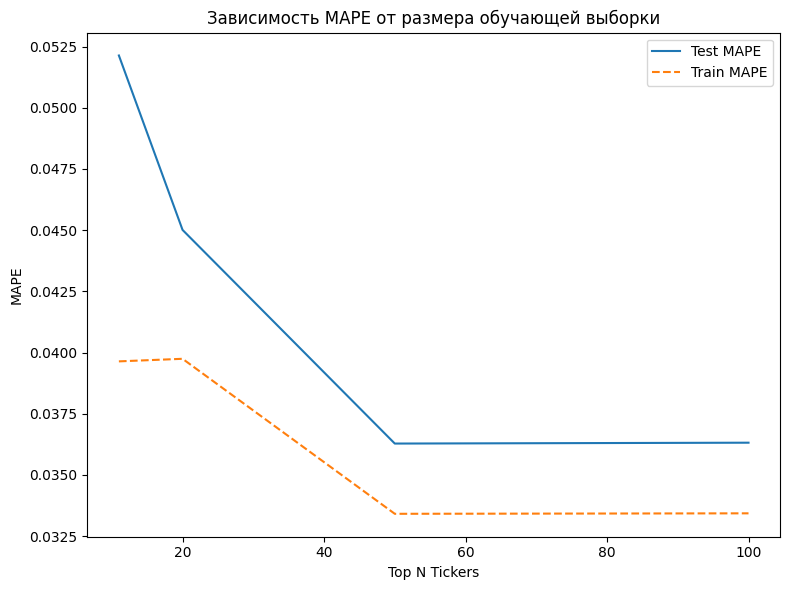

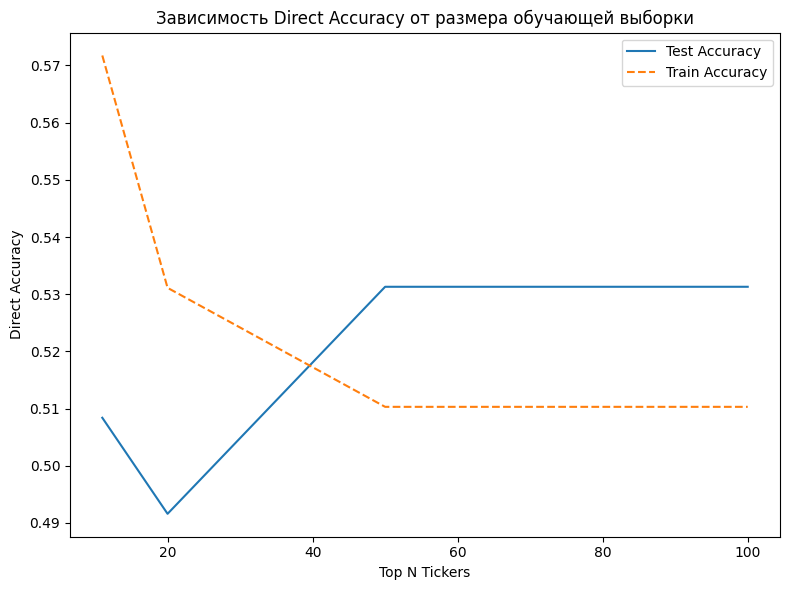

In [110]:
visual_res2(csv_files["all_enhanced_lstm_metrics_v4_big_df_study_WITH_diff_target"],
           title_mape="Зависимость MAPE от размера обучающей выборки",
           title_acc="Зависимость Direct Accuracy от размера обучающей выборки",
           x_label="top_n_tickers",
           x_label_name="Top N Tickers")

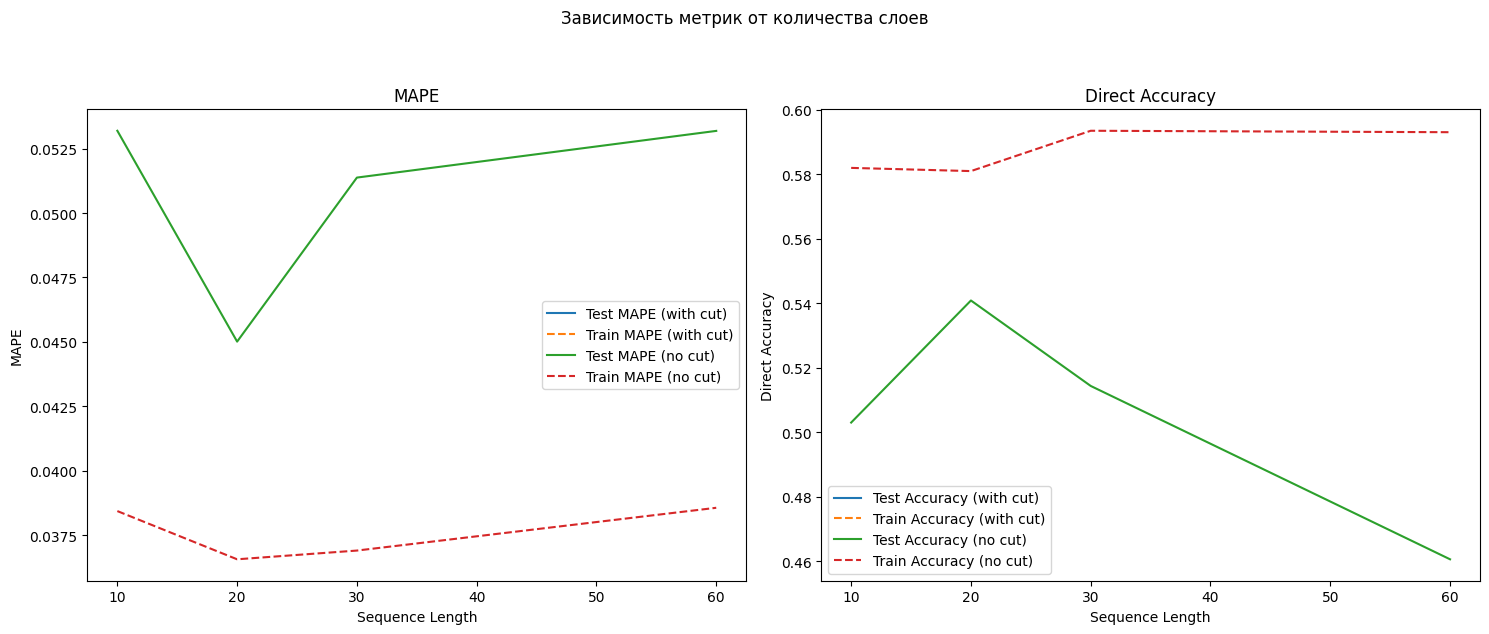

In [37]:
visual_res(csv_files["all_enhanced_lstm_metrics_v5_seq_len_WITH_diff_target"],
           title="Зависимость метрик от количества слоев",
           x_label="sequence_length",
           x_label_name="Sequence Length")

## Совместные график LSTM и EnhancedLSTM

In [87]:
def visual_res_comparison(lstm_df, enhanced_lstm_df,
                          title,
                          title2,
                          x_label, x_label_name,
                          is_log: bool = False):
    # --- Первый график: MAPE ---
    plt.figure(figsize=(8, 6))
    # LSTM с cut
    sns.lineplot(
        x=x_label, y="test_mape",
        data=lstm_df[lstm_df['do_cut_train'] == True],
        label='LSTM (smaller dataset)',
        linestyle='--'
    )
    # LSTM без cut
    sns.lineplot(
        x=x_label, y="test_mape",
        data=lstm_df[lstm_df['do_cut_train'] == False],
        label='LSTM',
        linestyle='-'
    )
    # Enhanced LSTM с cut
    sns.lineplot(
        x=x_label, y="test_mape",
        data=enhanced_lstm_df[enhanced_lstm_df['do_cut_train'] == True],
        label='EnhancedLSTM (smaller dataset)',
        linestyle=':'
    )
    # Enhanced LSTM без cut
    sns.lineplot(
        x=x_label, y="test_mape",
        data=enhanced_lstm_df[enhanced_lstm_df['do_cut_train'] == False],
        label='EnhancedLSTM',
        linestyle='-.'
    )
    plt.title(f"{title}")
    plt.xlabel(x_label_name)
    if is_log:
        plt.xscale('log')
    plt.ylabel("MAPE")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Второй график: Direct Accuracy ---
    plt.figure(figsize=(8, 6))
    # LSTM с cut
    sns.lineplot(
        x=x_label, y="test_direct_accuracy",
        data=lstm_df[lstm_df['do_cut_train'] == True],
        label='LSTM (smaller dataset)',
        linestyle='--'
    )
    # LSTM без cut
    sns.lineplot(
        x=x_label, y="test_direct_accuracy",
        data=lstm_df[lstm_df['do_cut_train'] == False],
        label='LSTM',
        linestyle='-'
    )
    # Enhanced LSTM с cut
    sns.lineplot(
        x=x_label, y="test_direct_accuracy",
        data=enhanced_lstm_df[enhanced_lstm_df['do_cut_train'] == True],
        label='EnhancedLSTM (smaller dataset)',
        linestyle=':'
    )
    # Enhanced LSTM без cut
    sns.lineplot(
        x=x_label, y="test_direct_accuracy",
        data=enhanced_lstm_df[enhanced_lstm_df['do_cut_train'] == False],
        label='EnhancedLSTM',
        linestyle='-.'
    )
    plt.title(f"{title2}")
    plt.xlabel(x_label_name)
    if is_log:
        plt.xscale('log')
    plt.ylabel("Direct Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

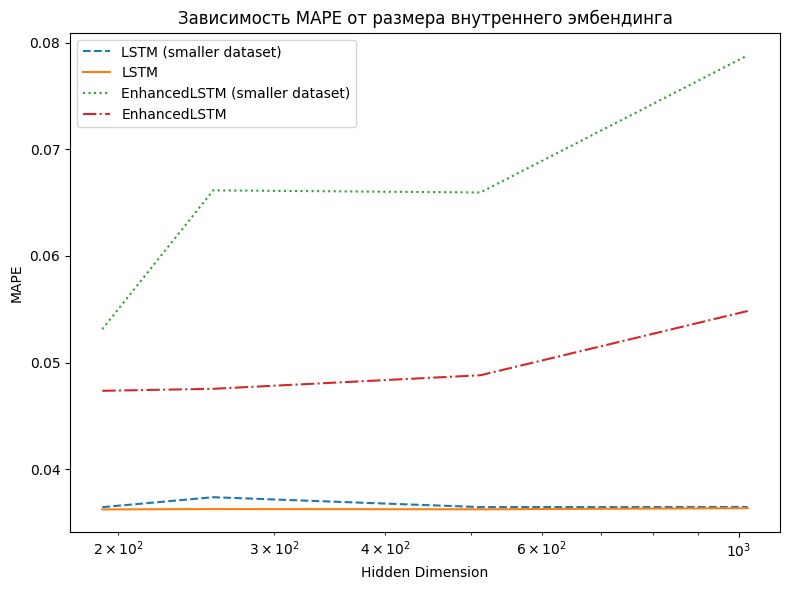

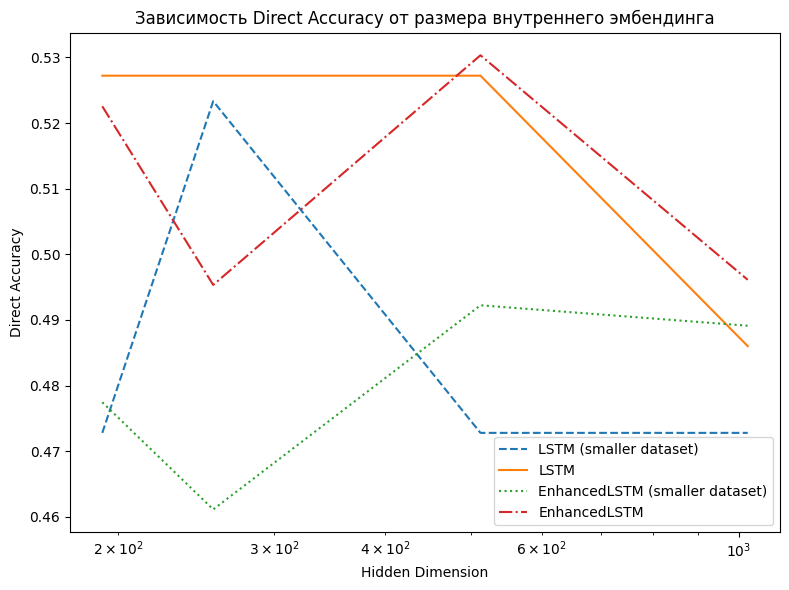

In [88]:
# Использование функции
visual_res_comparison(
    csv_files["all_lstm_metrics_v1_hidden_dim_WITH_diff_target"],
    csv_files["all_enhanced_lstm_metrics_v1_hidden_dim_WITH_diff_target"],
    title="Зависимость MAPE от размера внутреннего эмбендинга",
    title2="Зависимость Direct Accuracy от размера внутреннего эмбендинга",
    x_label="hidden_dim",
    x_label_name="Hidden Dimension",
    is_log=True,
)

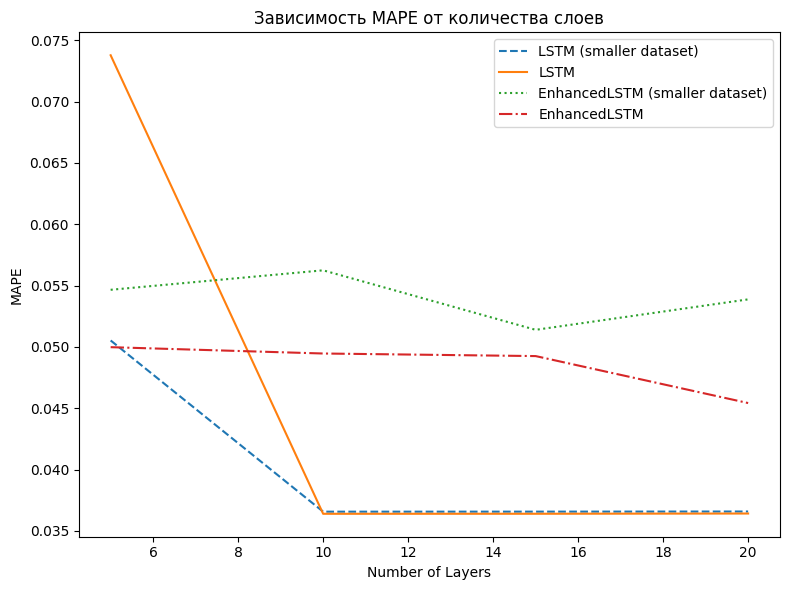

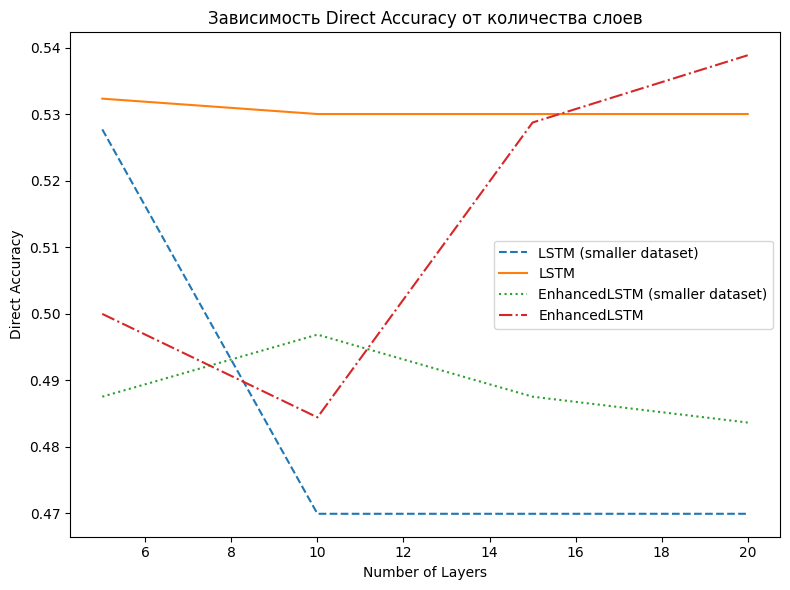

In [90]:
# Использование функции
visual_res_comparison(
    csv_files["all_lstm_metrics_v2_num_layers_WITH_diff_target"],
    csv_files["all_enhanced_lstm_metrics_v2_num_layers_WITH_diff_target"],
    title="Зависимость MAPE от количества слоев",
    title2="Зависимость Direct Accuracy от количества слоев",
    x_label="num_layers",
    x_label_name="Number of Layers"
)

## Таблица лучших метрик

In [111]:
best_lstm_mape = pd.concat(list(csv_files.values())[:2]).sort_values(by="test_mape").iloc[0]
display(best_lstm_mape)
best_lstm_direct_accuracy = pd.concat(list(csv_files.values())[:2]).sort_values(by="test_direct_accuracy", ascending=False).iloc[0]
display(best_lstm_direct_accuracy)
best_enhanced_lstm_mape = pd.concat(list(csv_files.values())[2:]).sort_values(by="test_mape").iloc[0]
display(best_enhanced_lstm_mape)
best_enhanced_lstm_direct_accuracy = pd.concat(list(csv_files.values())[2:]).sort_values(by="test_direct_accuracy", ascending=False).iloc[0]
display(best_enhanced_lstm_direct_accuracy)

Unnamed: 0                          0
lr                              0.001
do_cut_train                    False
hidden_dim                        192
num_layers                         10
train_mse                19826.399559
train_mape                   0.033386
train_direct_accuracy        0.510305
test_mse                  15116.47641
test_mape                    0.036236
test_direct_accuracy         0.527216
Name: 0, dtype: object

Unnamed: 0                          0
lr                              0.001
do_cut_train                    False
hidden_dim                        256
num_layers                          5
train_mse                38116.831834
train_mape                   0.069657
train_direct_accuracy        0.574993
test_mse                  58289.14993
test_mape                    0.073777
test_direct_accuracy         0.532357
Name: 0, dtype: object

Unnamed: 0                          2
lr                              0.001
do_cut_train                    False
hidden_dim                        512
num_layers                         10
train_mse                19818.854828
train_mape                   0.033411
train_direct_accuracy        0.510305
test_mse                 15023.150103
test_mape                    0.036281
test_direct_accuracy         0.531298
do_use_cnn                        NaN
do_use_attention                  NaN
do_use_lstm                       NaN
top_n_tickers                    50.0
sequence_length                   NaN
Name: 2, dtype: object

Unnamed: 0                          4
lr                              0.001
do_cut_train                    False
hidden_dim                        512
num_layers                         10
train_mse                14356.120665
train_mape                   0.039162
train_direct_accuracy        0.572034
test_mse                 36555.529718
test_mape                    0.068905
test_direct_accuracy         0.549307
do_use_cnn                      False
do_use_attention                False
do_use_lstm                      True
top_n_tickers                     NaN
sequence_length                   NaN
Name: 4, dtype: object

In [63]:
best_df = pd.DataFrame([
    {'model': "Catboost", "MAPE" : 0.036116, "Direct Accuracy" : 0.532949},
    {'model': "LSTM", "MAPE" : 0.036236, "Direct Accuracy" : 0.532357},
    {'model': "EnhancedLSTM", "MAPE" : 0.036281, "Direct Accuracy" : 0.549307},
])
best_df

,model,MAPE,Direct Accuracy
0,Catboost,0.036116,0.532949
1,LSTM,0.036236,0.532357
2,EnhancedLSTM,0.036281,0.549307
